# Sarsa Algorithm and the Windy Grid World Enviroment

__In this notebook, we are going to tackle the windy grid world environment with the Sarsa algorithm.__

## What is the Windy Grid World Environment?
Windy Gridworld as shown below is a standard gridworld, with start and goal states, but with one difference: there is a crosswind running upward through the middle of the grid. The actions are the standard four—up, down, right, and left—but in the middle region the resultant next states are shifted upward by a “wind,” the strength of which varies from column to column. The strength of the wind is given below each column, in number of cells shifted upward. For example, if you are one cell to the right of the goal, then the action left takes you to the cell just above the goal. The optimal path should look like this. (Why?)

<img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/windygrid_actual.png" width=400>
<table style="background-color: white; align: center; text-align: center;">
    <tr>
        <td style="text-align: center;">
            <h3>Start State</h3>
        </td>
        <td>
        </td>
        <td style="text-align: center;">
            <h3>Final State</h3>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world.png" width=300>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/arrow.jpeg" width=20>
        </td>
        <td>
            <img src="https://github.com/FredAmouzgar/DeepRL/raw/main/images/Windy_grid_world_end.png" width=300>
        </td>
    </tr>
</table>

----

In [1]:
# PLEASE RUN ME!
# INSTALLATIONS
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.done'):
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/python_Exercise/master/Colab_setup/setup_colab.sh -O- | bash
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/agents.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/envs.py
    !wget -q https://raw.githubusercontent.com/FredAmouzgar/DeepRL/main/Sarsa/train.py
    !touch .done

# Creating a virtual display to draw game images on.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

## Let's see how a random agent acts (50 random steps)

(7, -1, False)


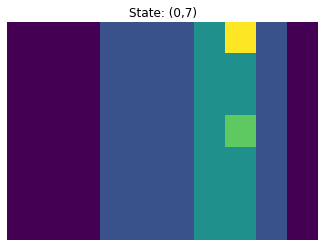

In [2]:
from envs import WindyGridWorld
from time import sleep
import numpy as np
from IPython.display import clear_output

%matplotlib inline
env = WindyGridWorld()

for i in range(50):
    a = np.random.choice([0,1,2,3])
    print(env.step(a))
    env.render()
    sleep(0.1)
    clear_output(wait=True)

## Training a Sarsa Agent for the Windy Grid World

__Notice that as the training progresses, the agent gets less negative reward, and manages to finish the task sooner.__

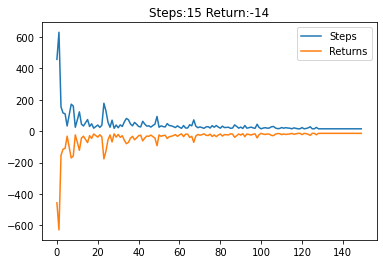

In [3]:
from envs import WindyGridWorld
from agents import Sarsa_Agent
from train import train_windygridworld, play

env = WindyGridWorld()
agent = Sarsa_Agent(env.states_n, env.actions_n,epsilon_decay=True)

train_windygridworld(env, agent, 150)

## Watch a Smart Agent:

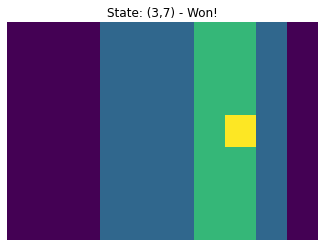

Done in 15 steps.
Actions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 0]
right, right, right, right, right, right, right, right, right, down, down, down, down, left, left, right, 


In [4]:
play(env, agent, episodes=2)

# How the learning happened?

The Sarsa agent is implementing a tabular method which means that it's updating a table of values iteratively. This table is called Q-table. After the training the agent knows exactly which actions are the best in almost all possible states.

## Here's its Q-table:

In [5]:
agent.Q

array([[ -9.66919922,  -9.86209954,  -9.66469005,  -9.5937649 ],
       [ -9.41593257,  -9.54853128,  -9.41637406,  -9.60316623],
       [ -9.07519647,  -9.35556924,  -9.03424178,  -9.16079615],
       [ -8.61786366,  -8.77715807,  -8.95088147,  -8.89320231],
       [ -8.0252607 ,  -8.05850146,  -8.16057242,  -8.40311458],
       [ -7.39501181,  -7.4869562 ,  -7.69275929,  -7.71269826],
       [ -6.73159137,  -6.93259639,  -6.97287863,  -6.90602799],
       [ -6.03325408,  -6.24719948,  -6.24826915,  -6.41189478],
       [ -5.29816219,  -5.43953147,  -5.34214177,  -5.32795512],
       [ -5.00233877,  -4.74070636,  -4.54808933,  -4.52438125],
       [ -9.77386361,  -9.63728259,  -9.74551318, -10.01640366],
       [ -9.51636033,  -9.79639238,  -9.59652443,  -9.61822286],
       [ -9.13537465,  -9.30444254,  -9.1175224 ,  -9.22147918],
       [ -8.61892326,  -8.63243173,  -8.87784055,  -8.81764636],
       [ -8.02510369,  -8.0866218 ,  -8.25768634,  -8.11247739],
       [ -7.39501181,  -7